# Tensor shape

After the raw and waveform data are loaded from external files, they are stored as Numpy array. However, to use those data in Pytorch, we need to further convert the Numpy arrays to Pytorch tensors. 

Conversion from Numpy array to Pytorch tensor is straightforward (see [Pytorch tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#numpy-bridge)). However, what is difficult is that different Pytorch APIs may expect different tensor shapes.

In this notebook, we mainly explain the semantics of tensor dimension for this NSF Pytorch project.

**Tensor shape**: we assume all tensors are in shape **(batchsize, length, dim-1, dim-2, ...)**, where 
   * batchsize: batch size of a data batch;
   * length: maximum length of data sequences in the batch;
   * dim-1: dimension of feature vector in one time step;
   * dim-2: when a feature vector per time step has more than 1 dimension;
   
Note that *Length* is equivalent to the number of frames or number of waveform sampling points.
   
<!-- Hidden layers should not change **batchsize** and **length** of input tensors unless specified (e.g., in down-sampling, up-sampling layers) -->


### 1. Examples on tensor shape

In [1]:
# At the begining, let's load packages 
from __future__ import absolute_import
from __future__ import print_function
import sys
import numpy as np
import torch

import tool_lib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 5)


In [2]:
# load mel and F0
mel_dim = 80
input_mel = tool_lib.read_raw_mat("data_models/acoustic_features/hn_nsf/slt_arctic_b0474.mfbsp", mel_dim)

# convert it into the required tensor format
input_mel_tensor = torch.tensor(input_mel).unsqueeze(0)

print("Shape of original data: " + str(input_mel.shape))
print("Shape of data as tensor: " + str(input_mel_tensor.shape))

Shape of original data: (554, 80)
Shape of data as tensor: torch.Size([1, 554, 80])


In [3]:
input_mel_tensor[0] - input_mel

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In the example above, the input_mel_tensor has shape (1, 554, 80), where
* 1: this batch has only one data
* 554: the data has 554 frames
* 80: each frame has 80 dimensions

### 2. Note

In the tutorial notebooks, we manually add the dimension corresponding to batch and create tensors from the Numpy array. 

In NSF project-NN-Pytorch-scripts, the default data io wrapped over [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#map-style-datasets) and [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) will automatically create tensor in (batchsize, N, M). Users just need to store the raw data in correct float32 format, the default data IO will automatically handle the conversion.

<!-- When all the data files in the dataset have the same shape \[N, M\], the default IO can return a mini-batch (batchsize>1, N, M). Otherwise, it can only put a single sample in each mini-batch. -->

In the tutorial notebooks, we may use batchsize>1 for demonstrations. In NSF project-NN-Pytorch-scripts, we only use batchsize=1 for NSF models training. 


### 3. Misc

Here is one function to plot tensors of shape (batchsize, length, dim)

(<Figure size 540x36 with 1 Axes>,
 [<matplotlib.axes._axes.Axes at 0x7f955b986110>])

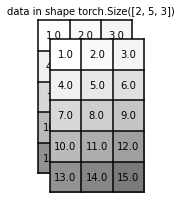

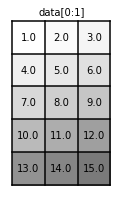

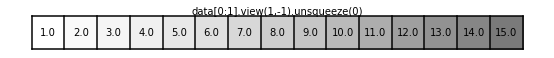

In [4]:
import plot_lib
import torch
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

# example 1
plot_lib.plot_tensor(data.numpy(), color_on_value=True, shift=0.1, title='data in shape %s' % (str(data.shape)))
plot_lib.plot_tensor(data[0:1], color_on_value=True, title='data[0:1]')
plot_lib.plot_tensor(data[0:1].view(1, -1).unsqueeze(0), color_on_value=True, 
                     title='data[0:1].view(1,-1).unsqueeze(0)')

# example 2
# plot_lib.plot_tensor(torch.tensor([[1,2,3,4,5]]).unsqueeze(0).permute(0, 2, 1), color_on_value=True)

The end